# Install and import dependencies.

Make sure the python version is higher than 3.8 and lower than 3.12.

In [ ]:
!python3 --version

Python 3.11.13


Install pandasai 3.0.0b2 or newer.

In [ ]:
!pip install "pandasai>=3.0.0b2"

Intall pandasai liteLLM.

In [ ]:
!pip install pandasai-litellm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.3/278.3 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 947.6/947.6 kB 33.7 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.95.1
    Uninstalling openai-1.95.1:
      Successfully uninstalled openai-1.95.1


Import dependencies.

In [ ]:
import os
import io
import re
import time
import json
import random
import pandas as pd
import pandasai as pai
from getpass import getpass
from litellm import completion
from google.colab import files
from pandasai import SmartDataframe, SmartDatalake
from pandasai_litellm.litellm import LiteLLM
from pandasai.core.response.dataframe import DataFrameResponse

# Create new domain.

Input domain name.

In [ ]:
domain = input("Enter new domain name: ")

Enter new domain name: Campaign


Upload files.

In [ ]:
uploaded = files.upload(f"/domain/{domain}")

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving area_m0.csv to /domain/Campaign/area_m0.csv
Saving area_m1.csv to /domain/Campaign/area_m1.csv
Saving arpu.csv to /domain/Campaign/arpu.csv
Saving channel_m1.csv to /domain/Campaign/channel_m1.csv
Saving cumulative.csv to /domain/Campaign/cumulative.csv
Saving daily.csv to /domain/Campaign/daily.csv
Saving product.csv to /domain/Campaign/product.csv
Saving product_dsc.csv to /domain/Campaign/product_dsc.csv
Saving branch.csv to /domain/Campaign/branch.csv
Saving channel_m0.csv to /domain/Campaign/channel_m0.csv
Saving period.csv to /domain/Campaign/period.csv
Saving periode_date.csv to /domain/Campaign/periode_date.csv
Saving region_m0.csv to /domain/Campaign/region_m0.csv
Saving region_m1.csv to /domain/Campaign/region_m1.csv
Saving trend_target_addon.csv to /domain/Campaign/trend_target_addon.csv
User uploaded file "/domain/Campaign/area_m0.csv" with length 219 bytes
User uploaded file "/domain/Campaign/area_m1.csv" with length 210 bytes
User uploaded file "/domain/Campaign/ar

Get list of the uploaded files.

In [ ]:
def list_files_in_directory(directory_path):
    """
    Lists all files within a specified directory.

    Args:
        directory_path (str): The path to the directory.

    Returns:
        list: A list of file names found in the directory.
    """
    files_in_directory = []
    try:
        all_entries = os.listdir(directory_path)

        for entry in all_entries:
            full_path = os.path.join(directory_path, entry)
            if os.path.isfile(full_path):
                files_in_directory.append(entry)
    except FileNotFoundError:
        print(f"Error: Directory not found at '{directory_path}'")
    except Exception as e:
        print(f"An error occurred: {e}")
    return files_in_directory

directory_to_check = f'/domain/{domain}'

files = list_files_in_directory(directory_to_check)

if files:
    print(f"Files in '{directory_to_check}':")
    for file_name in files:
        print(file_name)
else:
    print(f"No files found in '{directory_to_check}' or an error occurred.")

Files in '/domain/Campaign':
channel_m0.csv
cumulative.csv
product.csv
arpu.csv
product_dsc.csv
trend_target_addon.csv
period.csv
periode_date.csv
channel_m1.csv
daily.csv
area_m1.csv
branch.csv
area_m0.csv
region_m1.csv
region_m0.csv


Collect .info() of each dataset to be used.

In [ ]:
data_info = {}
dfs = {}
for file_name in files:
  #dfs[f"{i}"] = pai.read_csv(f"/domain/{domain}/{files[i]}")
  dfs[f"{file_name}"] = pd.read_csv(f"/domain/{domain}/{file_name}", sep='|')
  df = dfs[f"{file_name}"]
  buf = io.StringIO()
  df.info(buf=buf)
  data_info[f"{file_name}"] = buf.getvalue()
  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   channel_name  10 non-null     object 
 1   taker         10 non-null     int64  
 2   trx           10 non-null     int64  
 3   rev           10 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 452.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   event_date        1 non-null      object 
 1   latest_period_wl  0 non-null      float64
 2   cum_target        1 non-null      int64  
 3   cum_deliv         1 non-null      int64  
 4   cum_taker         1 non-null      int64  
 5   cum_trx           1 non-null      int64  
 6   cum_rev           1 non-null      float64
dtypes: float64(2), int64(4), object(1)
memory usag

Collect .describe() of each dataset to be used.

In [ ]:
data_describe = {}
for file_name in files:
  df = dfs[f"{file_name}"]
  data_describe[f"{file_name}"] = df.describe(include='all')
  print(data_describe[f"{file_name}"] )

        channel_name       taker         trx           rev
count             10   10.000000   10.000000  1.000000e+01
unique            10         NaN         NaN           NaN
top     FMC - Upoint         NaN         NaN           NaN
freq               1         NaN         NaN           NaN
mean             NaN   81.000000   82.500000  5.223954e+06
std              NaN  199.941102  201.367685  1.142833e+07
min              NaN    0.000000    0.000000  0.000000e+00
25%              NaN    0.000000    0.000000  0.000000e+00
50%              NaN    0.000000    0.000000  0.000000e+00
75%              NaN   14.500000   14.500000  1.244365e+06
max              NaN  634.000000  637.000000  3.490830e+07
        event_date  latest_period_wl  cum_target  cum_deliv  cum_taker  \
count            1               0.0         1.0        1.0        1.0   
unique           1               NaN         NaN        NaN        NaN   
top     2025-09-05               NaN         NaN        NaN        NaN

# Setup agent.

Set OpenAI API key.

In [ ]:
api_key = os.getenv("OPENAI_API_KEY") or os.getenv("GEMINI_API_KEY") or getpass("Enter your OpenAI API key: ")
os.environ["OPENAI_API_KEY"] = api_key
os.environ["GEMINI_API_KEY"] = api_key

Enter your OpenAI API key: ··········


or

In [ ]:
api_key = getpass("Enter your API key: ")
os.environ["OPENAI_API_KEY"] = api_key
os.environ["GEMINI_API_KEY"] = api_key

Enter your API key: ··········


# Orchestrate LLMs.

Get user prompt.

In [ ]:
"""
Analyze performance by product for m0;
Include columns and in the order of: Product Group, Product, Target, % TUR, Taker, % Taker, Taker % MoM, Transaction,  % Transaction, Transaction % MoM, Revenue Squad,  % Revenue squad, Revenue squad % MoM, Revenue All, % Rev Squad, Trx/Subs, Rev/Subs, Rev/Trx;
target should be in mn (million);
%TUR is take up rate percentage;
% Taker, % Transaction, and % Revenue squad is the percentage of each product of all product
Revenue all is in bn which is billion idr;
Revenue Squad is in mn wich is million idr;
rev/subs and rev/trx should be in thousands of idr;
MoM is month after month in percentage;
Subs is taker;
Use table.
"""

'\nAnalyze performance by product for m0; \nInclude columns and in the order of: Product Group, Product, Target, % TUR, Taker, % Taker, the taker % MoM, Transaction,  % Transaction, the Transaction % MoM, Revenue Squad,  % Revenue squad, the revenue squad % MoM, Revenue All, % Rev Squad, Trx/Subs, Rev/Subs, Rev/Trx; \ntarget should be in mn (million); \n%TUR is take up rate percentage;\n% Taker, % Transaction, and % Revenue squad is the percentage of each product of all product\nRevenue all is in bn which is billion idr;\nRevenue Squad is in mn wich is million idr;\nrev/subs and rev/trx should be in thousands of idr;\nMoM is month after month in percentage;\t\t\nSubs is taker; \nUse table.\n'

In [ ]:
user_prompt = input("Enter your prompt: ")

Enter your prompt: Analyze performance by product for m0; Include columns and in the order of: Product Group, Product, Target, % TUR, Taker, % Taker, Taker % MoM, Transaction,  % Transaction, Transaction % MoM, Revenue Squad,  % Revenue squad, Revenue squad % MoM, Revenue All, % Rev Squad, Trx/Subs, Rev/Subs, Rev/Trx; target should be in mn (million); %TUR is take up rate percentage; % Taker, % Transaction, and % Revenue squad is the percentage of each product of all product Revenue all is in bn which is billion idr; Revenue Squad is in mn wich is million idr; rev/subs and rev/trx should be in thousands of idr; MoM is month after month in percentage; Subs is taker; Use table.


Translate user prompt into 3 prompts for each pandasai agents and a system content for response compiler.

In [ ]:
orchestrator_start_time = time.time()

initial_response = completion(
    model="gemini/gemini-2.5-pro",
    messages=[
        {"role": "system", "content": """
        You are the Orchestrator.

            15 instructions you need to follow as the orchestrator:
    1. Think step by step.
    2. You orchestrate 3 LLM PandasAI Agents for business data analysis.
    3. The 3 agents are: Data Manipulator, Data Visualizer, Data Analyser.
    4. You will emit a specific prompt for each of those 3 agents.
    5. Each prompt is a numbered, step-by-step instruction set.
    6. Prompts must be clear, detailed, and complete to avoid ambiguity.
    7. The number of steps may differ per agent.
    8. Example user tasks include:
    8a. What is my revenue this week vs last week?
    8b. Why did my revenue drop this week?
    8c. Any surprises in revenue this month?
    8d. Notable trends this month?
    8e. Correlation between revenue and bounces?
    8f. Is this conversion rate normal for this time of year?
    9. Reason strictly from the user-provided data.
    10. Convert a short business question into three specialist prompts.
    11. If a currency is not explicitly stated assume its in Indonesian Rupiah.
    13. All specialists operate in Python using PandasAI SmartDataframe as `sdf` (backed by pandas `df`).
    14. Return STRICT JSON with keys: manipulator_prompt, visualizer_prompt, analyzer_prompt, compiler_instruction.
    15. Each value must be a **single line** string. No extra keys, no prose, no markdown/code fences.

    6 instructions for data manipulator prompt creation:
    1. Enforce data hygiene before analysis.
    1a. Parse dates to pandas datetime, create explicit period columns (day/week/month).
    1b. Set consistent dtypes for numeric fields; strip/normalize categorical labels; standardize currency units if present.
    1c. Handle missing values: impute or drop **only when necessary**; keep legitimate zeros.
    2. Mind the term like m0 and m1 which means month 1 and 2 and any other similar terms used to decide if something is increasing or decreasing.
    3. Mind each of the datasets name.
    4. Produce exactly the minimal, analysis-ready dataframe(s) needed for the user question, with stable, well-named columns.
    5. Include the percentage version of the raw value on the column that you think is appropriate to include.
    6. End by returning only:
       result = {"type":"dataframe","value": <THE_FINAL_DATAFRAME>}

    15 instructions for data visualizer prompt creation:
    1. Produce exactly ONE interactive visualization (a Plotly diagram or an HTML table) per request.
    2. Choose the best form of visualization based on the user's question. Use a Plotly diagram for trends and comparisons; use a styled HTML table for ranked lists or data with percentages.
    3. For Plotly diagrams: Prevent overlaps by rotating axis ticks ≤45°, wrapping long labels, ensuring adequate margins, and placing the legend outside the plot area.
    4. For Plotly diagrams: Apply insight-first formatting: include a clear title and subtitle, label axes with units, use thousands separators, and configure a rich hover-over.
    5. Aggregate data to a sensible granularity (e.g., day, week, or month) and cap extreme outliers for readability (noting this in the subtitle).
    6. For Plotly diagrams: To ensure high contrast, instruct the agent to use a truncated monochromatic colorscale by skipping the lightest 25% of a standard scale (e.g., 'Blues').
    7. The prompt must specify how to truncate the scale, for example: "Create a custom colorscale by sampling 'Blues' from 0.25 to 1.0." The gradient must map to data values (lighter for low, darker for high).
    8. For Plotly diagrams: Use a bar chart, grouped bar chart, or line chart.
    9. If a table visualization is chosen, instruct the agent to use the Pandas Styler object to generate the final HTML, not Plotly. Enforce a monochromatic blue palette only (no red or green): use tints/shades of a single blue (e.g., very light → very dark) for accents and data bars. Apply zebra striping to table rows with alternating white and light grey backgrounds (e.g., #FFFFFF and #F5F5F5). Hide the index in the rendered table.
    10. The prompt must specify using the Styler.bar() method only on columns that represent share-of-total percentages and only when the column total ≈ 100% (allow small rounding tolerance). These are the columns analogous to “% of all” fields (e.g., “% Taker”, “% Transaction”, “% Revenue Squad” when present). Bars must be left-aligned, constrained with vmin=0, and use one blue color (single hue).
    10a. Example instruction: “Identify share-of-total percentage columns whose values sum to ~100%. Apply in-cell data bars with df.style.bar(subset=share_cols, align='left', color='#5DADE2', vmin=0). Ensure non-share percentage columns (e.g., rates like TUR) do not receive bars.”
    11. Output Python code only (no prose/comments/markdown). Import os and datetime. Build a directory and a run-scoped timestamped filename using a run ID stored in globals:
        dir_path = "/content/exports/domain/table"
        os.makedirs(dir_path, exist_ok=True)
        rid = globals().get("_RUN_ID")
        if not isinstance(rid, str) or not rid:
            import datetime as _dt
            rid = _dt.datetime.utcnow().strftime("%Y%m%d%H%M%S%f")
            globals()["_RUN_ID"] = rid
        file_path = os.path.join(dir_path, f"some-slug-{rid}.html")
    12. Write the file exactly once using an atomic lock to avoid duplicates across retries:
        lock_path = file_path + ".lock"
        try:
            fd = os.open(lock_path, os.O_CREAT | os.O_EXCL | os.O_WRONLY)
            try:
                if "fig" in globals():
                    fig.write_html(file_path, include_plotlyjs="cdn", full_html=True)
                else:
                    html_str = styled_html if "styled_html" in globals() else sdf._obj.to_html(index=False)
                    with open(file_path, "w", encoding="utf-8") as f:
                        f.write(html_str)
            finally:
                os.close(fd)
        except FileExistsError:
            pass
    13. Ensure file_path is a plain Python string and do not print/return anything else:
        file_path = str(file_path)
    14. The last line of code MUST be exactly:
        result = {"type": "file", "value": file_path}
    15. DO NOT return the raw HTML string in the value field.

    3 instructions for data analyzer prompt creation:
    1. Write like you’re speaking to a person; be concise and insight-driven.
    2. Quantify where possible (deltas, % contributions, time windows); reference the exact columns/filters used.
    3. Return only:
        result = {"type":"string","value":"<3–6 crisp bullets or 2 short paragraphs of insights>"}

    34 instructions for response compiler system content creation:
    1. Brevity: ≤180 words; bullets preferred; no code blocks, no JSON, no screenshots.
    2. Lead with the answer: 1–2 sentence “Bottom line” with main number, time window, and delta.
    3. Quantified drivers: top 3 with magnitude, direction, and approx contribution (absolute and % where possible).
    4. Next actions: 2–4 prioritized, concrete actions with expected impact/rationale.
    5. Confidence & caveats: one short line on data quality/assumptions/gaps; include Confidence: High/Medium/Low.
    6. Minimal tables: ≤1 table only if essential (≤5×3); otherwise avoid tables.
    7. No repetition: do not restate agent text; synthesize it.
    8. Do not try to show images; if a chart exists, mention the HTML path only.
    9. Always include units/currency and exact comparison window (e.g., “Aug 2025 vs Jul 2025”, “W34 vs W33”).
    10. Show both absolute and % change where sensible (e.g., “+$120k (+8.4%)”).
    11. Round smartly (money to nearest K unless < $10k; rates 1–2 decimals).
    12. If any agent fails or data is incomplete, still produce the best insight; mark gaps in Caveats and adjust Confidence.
    13. If the user asks “how much/which/why,” the first sentence must provide the number/entity/reason.
    14. Exact compiler_instruction template the orchestrator should emit (single line; steps separated by ';'):
    15. Read the user prompt, data_info, and all three agent responses;
    16. Compute the direct answer including the main number and compare period;
    17. Identify the top 3 quantified drivers with direction and contribution;
    18. Draft 'Bottom line' in 1–2 sentences answering plainly;
    19. List 2–4 prioritized Next actions with expected impact;
    20. Add a one-line Caveats with Confidence and any gaps;
    21. Keep ≤180 words, use bullets, avoid tables unless ≤5×3 and essential;
    22. Include units, absolute and % deltas, and explicit dates;
    23. Do not repeat agent text verbatim or include code/JSON.
    24. Format hint (shape, not literal):
    24a. Bottom line — <answer with number + timeframe>.
    24b. Drivers — <A: +X (≈Y%); B: −X (≈Y%); C: ±X (≈Y%)>.
    24c. Next actions — 1) <action>; 2) <action>; 3) <action>.
    24d. Caveats — <one line>. Confidence: <High/Medium/Low>.
    25. compiler_instruction must contain clear, step-by-step instructions to assemble the final response.
    26. The final response must be decision-ready and insight-first, not raw data.
    27. The compiler_instruction is used as the compiler LLM’s system content.
    28. Compiler user content will be: f"User Prompt:{user_prompt}. \nData Info:{data_info}. \nData Describe:{data_describe}. \nData Manipulator Response:{data_manipulator_response}. \nData Visualizer Response:{data_visualizer_response}. \nData Analyzer Response:{data_analyzer_response}".
    29. `data_info` is a string from `df.info()`.
    30. `data_manipulator_response` is a PandasAI DataFrameResponse.
    31. `data_visualizer_response` is a **file path to an HTML** inside `{"type":"file","value": ...}`. The `value` MUST be a plain Python string containing the path.
    32. `data_analyzer_response` is a PandasAI StringResponse.
    33. Your goal in `compiler_instruction` is to force brevity, decisions, and insights.
    34. The compiler must NOT echo raw dataframes, code, or long tables; it opens with the business answer, quantifies drivers, and closes with next actions.
        """},
        {"role": "user", "content": f"User Prompt: {user_prompt} \nDatasets Domain name: {domain}. \ndf.info of each dfs key(file name)-value pair:\n{data_info}. \df.describe of each dfs key(file name)-value pair:\n{data_describe}."}
    ],
    seed=1,
    stream=False,
    verbosity="low",# (concise) low | medium | high (long)
    drop_params=True,
    reasoning_effort="high", # (fast) minimal | low | medium | high (depth)
)

def get_content(r):
    try:
        msg = r.choices[0].message
        return msg["content"] if isinstance(msg, dict) else msg.content
    except Exception:
        pass

    if isinstance(r, dict):
        return r.get("choices", [{}])[0].get("message", {}).get("content", "")

    try:
        chunks = []
        for ev in r:
            delta = getattr(ev.choices[0], "delta", None)
            if delta and getattr(delta, "content", None):
                chunks.append(delta.content)
        return "".join(chunks)
    except Exception:
        return str(r)

initial_content = get_content(initial_response)
print(initial_content)

try:
    spec = json.loads(initial_content)
except json.JSONDecodeError:
    start = initial_content.find("{")
    end = initial_content.rfind("}")
    spec = json.loads(initial_content[start:end+1])

manipulator_prompt = spec["manipulator_prompt"]
visualizer_prompt  = spec["visualizer_prompt"]
analyzer_prompt    = spec["analyzer_prompt"]
compiler_instruction    = spec["compiler_instruction"]
print(manipulator_prompt)
print(visualizer_prompt)
print(analyzer_prompt)
print(compiler_instruction)
orchestrator_end_time = time.time()
orchestrator_elapsed_time = orchestrator_end_time - orchestrator_start_time
print(f"Elapsed time: {orchestrator_elapsed_time:.2f} seconds")

```json
{
"manipulator_prompt": "1. From the 'product.csv' dataframe, create a new dataframe for analysis. 2. To prevent division by zero, replace any potential NaN or infinity values with 0 in all subsequent calculation steps. 3. Calculate '% TUR' as (deliv_taker_m0 / deliv_m0) * 100. 4. Calculate '% Taker' as (taker_m0 / total taker_m0) * 100. 5. Calculate 'Taker % MoM' as ((taker_m0 - taker_m1) / taker_m1) * 100. 6. Calculate '% Transaction' as (trx_m0 / total trx_m0) * 100. 7. Calculate 'Transaction % MoM' as ((trx_m0 - trx_m1) / trx_m1) * 100. 8. Calculate '% Revenue squad' as (rev_squad_m0 / total rev_squad_m0) * 100. 9. Calculate 'Revenue squad % MoM' as ((rev_squad_m0 - rev_squad_m1) / rev_squad_m1) * 100. 10. Calculate '% Rev Squad' as (rev_squad_m0 / rev_all) * 100, representing the portion of squad revenue within the product's total revenue. 11. Calculate 'Trx/Subs' as trx_m0 / taker_m0. 12. Calculate 'Rev/Subs' as (rev_squad_m0 / taker_m0) / 1000. 13. Calculate 'Rev/Trx' as

# Delegate tasks.

Execute data manipulation prompt.

In [ ]:
llm = LiteLLM(model="gemini/gemini-2.5-pro", api_key=api_key)

pai.config.set({
    "llm": llm,
})

data_manipulator_start_time = time.time()

data_manipulator = SmartDatalake(
    list(dfs.values()),
    config={
        "llm": llm,
        "seed": 1,
        "stream": False,
        "verbosity": "low", # (concise) low | medium | high (long)
        "drop_params": True,
        "save_charts": False,
        "open_charts": False,
        "conversational": False,
        "enforce_privacy": True,
        "reasoning_effort": "high", # (faster) minimal | low | medium | high (depth)
        "save_charts_path": "./charts"
    }
)
data_manipulator_response = data_manipulator.chat(manipulator_prompt)

data_manipulator_content = get_content(data_manipulator_response)
print(data_manipulator_content)

data_manipulator_end_time = time.time()
data_manipulator_elapsed_time = data_manipulator_end_time - data_manipulator_start_time
print(f"Elapsed time: {data_manipulator_elapsed_time:.2f} seconds")

/tmp/ipython-input-26-4262171411.py:9: DeprecationWarning: 
********************************************************************************
DEPRECATION WARNING:
SmartDatalake will be deprecated soon. Use df.chat() instead.
********************************************************************************

  data_manipulator = SmartDatalake(


   Product Group             Product    Target  % TUR  Taker  % Taker  \
0      OTT Video           Catchplay  0.424360   0.00     55     6.77   
1      OTT Video              Disney  0.424360   0.00      5     0.62   
2      OTT Video                Fita  0.000000   0.00      0     0.00   
3      OTT Video             Genflix  0.000000   0.00      0     0.00   
4      OTT Video                 HBO  0.600209   0.00      3     0.37   
5      OTT Video        Iflix (WeTV)  0.000000   0.00      0     0.00   
6      OTT Video         Indihome TV  0.000000   0.00      0     0.00   
7      OTT Video               Iqiyi  0.969971   0.00      1     0.12   
8      OTT Video             Karaoke  0.000000   0.00      0     0.00   
9      OTT Video              Kuncie  0.000000   0.00      0     0.00   
10     OTT Video           Lionsgate  0.000000   0.00      0     0.00   
11     OTT Video                Mola  0.000000   0.00      0     0.00   
12     OTT Video             Netflix  0.000000   0.

Execute data visualization prompt.

In [ ]:
llm = LiteLLM(model="gemini/gemini-2.5-pro", api_key=api_key)

pai.config.set({
    "llm": llm,
})

data_visualizer_start_time = time.time()

if isinstance(data_manipulator_response, DataFrameResponse):
    df_processed = data_manipulator_response.value
else:
    df_processed = data_manipulator_response

assert isinstance(df_processed, pai.pd.DataFrame)
#print(df_processed.head())

data_visualizer = SmartDataframe(
    df_processed,
    config={
        "llm": llm,
        "seed": 1,
        "stream": False,
        "verbosity": "low", # (concise) low | medium | high (long)
        "drop_params": True,
        "save_charts": False,
        "open_charts": False,
        "conversational": False,
        "enforce_privacy": True,
        "reasoning_effort": "high", # (faster) minimal | low | medium | high (depth)
        "save_charts_path": "./charts"
        }
)
data_visualizer_response = data_visualizer.chat(visualizer_prompt)

data_visualizer_end_time = time.time()
data_visualizer_elapsed_time = data_visualizer_end_time - data_visualizer_start_time
print(f"Elapsed time: {data_visualizer_elapsed_time:.2f} seconds")

/tmp/ipython-input-27-283381548.py:17: DeprecationWarning: 
********************************************************************************
DEPRECATION WARNING:
SmartDataframe will soon be deprecated. Please use df.chat() instead.
********************************************************************************

  data_visualizer = SmartDataframe(


Elapsed time: 140.82 seconds


Display data visualizer generated chart.

In [ ]:
from IPython.display import HTML
html_file_path = f'{data_visualizer_response.value}'
html_file_path = data_visualizer_response.value.split(' ')[-1]
with open(html_file_path, 'r') as f:
        html_content = f.read()
HTML(html_content)

Product Group,Product,Target,% TUR,Taker,% Taker,Taker % MoM,Transaction,% Transaction,Transaction % MoM,Revenue Squad,% Revenue squad,Revenue squad % MoM,Revenue All,% Rev Squad,Trx/Subs,Rev/Subs,Rev/Trx
OTT Video,Catchplay,0.42,0.00,55,6.77,96.43,55,6.67,96.43,4.80,9.19,62.05,0.07,6.83,1.00,87.27,87.27
OTT Video,Disney,0.42,0.00,5,0.62,150.00,5,0.61,150.00,0.24,0.47,150.00,0.02,1.62,1.00,49.00,49.00
OTT Video,Fita,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
OTT Video,Genflix,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
OTT Video,HBO,0.60,0.00,3,0.37,-50.00,3,0.36,-50.00,0.25,0.47,-33.09,0.00,40.09,1.00,82.18,82.18
OTT Video,Iflix (WeTV),0.00,0.00,0,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
OTT Video,Indihome TV,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
OTT Video,Iqiyi,0.97,0.00,1,0.12,-75.00,1,0.12,-75.00,0.00,0.00,-75.00,0.00,0.00,1.00,0.01,0.01
OTT Video,Karaoke,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
OTT Video,Kuncie,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Execute data analyzation prompt.

In [ ]:
llm = LiteLLM(model="gemini/gemini-2.5-pro", api_key=api_key)

pai.config.set({
    "llm": llm,
})

data_analyzer_start_time = time.time()

data_analyzer = SmartDataframe(
    df_processed,
    config={
        "llm": llm,
        "seed": 1,
        "stream": False,
        "verbosity": "low", # (concise) low | medium | high (long)
        "drop_params": True,
        "save_charts": False,
        "open_charts": False,
        "conversational": True,
        "enforce_privacy": False,
        "reasoning_effort": "high", # (faster) minimal | low | medium | high (depth)
        "save_charts_path": "./charts"
    }
)
data_analyzer_response = data_analyzer.chat(analyzer_prompt)

data_analyzer_content = get_content(data_analyzer_response)
print(data_analyzer_content)

data_analyzer_end_time = time.time()
data_analyzer_elapsed_time = data_analyzer_end_time - data_analyzer_start_time
print(f"Elapsed time: {data_analyzer_elapsed_time:.2f} seconds")

/tmp/ipython-input-29-3136864711.py:9: DeprecationWarning: 
********************************************************************************
DEPRECATION WARNING:
SmartDataframe will soon be deprecated. Please use df.chat() instead.
********************************************************************************

  data_analyzer = SmartDataframe(


- Dominant Performer: Vidio is the clear leader, contributing the most to key metrics with 68.76% of Takers and a commanding 56.61% of squad revenue.
- Exceptional Growth: Vidio shows the highest growth, with a 308.03% MoM increase in takers and 223.38% in revenue. Disney also displays strong momentum with 150.00% MoM taker growth.
- Significant Decline: Smarthome (IP Cam) is facing a major downturn, evidenced by a 77.78% MoM decrease in takers and a 77.78% reduction in squad revenue.
- High Revenue Efficiency: Speed Refreshment and Kuota Keluarga are the most efficient products, generating the highest Revenue per Subscriber (Rev/Subs) at 147.64 and 124.49 respectively. This indicates a high-value subscriber base for these products.
Elapsed time: 42.58 seconds


# Compile reponses.

Compile the response of all 3 pandasai agents to respond the user prompt.

In [ ]:
response_compiler_start_time = time.time()

buf = io.StringIO()
df.info(buf=buf)
data_info = buf.getvalue()

final_response = completion(
    model="gemini/gemini-2.5-pro",
    messages=[
        {"role": "system", "content": compiler_instruction},
        {"role": "user", "content": f"User Prompt:{user_prompt}. \nDatasets Domain name: {domain}. \ndf.info of each dfs key(file name)-value pair:\n{data_info}. \df.describe of each dfs key(file name)-value pair:\n{data_describe}. \nData Visualizer Response:{data_visualizer_response.value}. \nData Analyzer Response:{data_analyzer_response}."},
        ],
    seed=1,
    stream=False,
    verbosity="medium", # (concise) low | medium | high (long)
    drop_params=True,
    reasoning_effort="high", # (faster) minimal | low | medium | high (depth)
    )
final_content = get_content(final_response)
print(final_content)

response_compiler_end_time = time.time()
response_compiler_elapsed_time = response_compiler_end_time - response_compiler_start_time
print(f"Elapsed time: {response_compiler_elapsed_time:.2f} seconds")
print(f"Total response time: {(orchestrator_elapsed_time+data_manipulator_elapsed_time+data_visualizer_elapsed_time+data_analyzer_elapsed_time+response_compiler_elapsed_time):.2f}")

**Direct Answer**
In m0, total squad revenue was 52.24 mn IDR (+74.3% vs m1), with total revenue reaching 0.69 bn IDR. The OTT Video group dominated performance, driven primarily by the Vidio product, which accounted for over half of all squad revenue.

**Top 3 Quantified Drivers**
*   **Top Contributor:** Vidio was the clear leader, generating 29.57 mn IDR (56.6%) of all squad revenue from 559 takers.
*   **Highest Growth:** Vidio also led month-over-month growth, with takers increasing by +308% vs m1. Disney+ Hotstar followed with a significant +150% taker increase.
*   **Steepest Decline:** Smarthome (IP Cam) experienced the sharpest downturn, with revenue falling by -77.8% (-0.21 mn IDR) and takers declining by 7 vs m1.

**Bottom line**
The OTT Video group, led by Vidio's exceptional growth, drives the majority of product revenue. However, performance is highly concentrated, with smaller products like Smarthome declining sharply.

**Next Actions**
*   Investigate the drivers behind

# Test Summary <br>
###User prompt:<br>
Analyze performance by product for m0;
Include columns and in the order of: Product Group, Product, Target, % TUR, Taker, % Taker, Taker % MoM, Transaction,  % Transaction, Transaction % MoM, Revenue Squad,  % Revenue squad, Revenue squad % MoM, Revenue All, % Rev Squad, Trx/Subs, Rev/Subs, Rev/Trx;
target should be in mn (million);
%TUR is take up rate percentage;
% Taker, % Transaction, and % Revenue squad is the percentage of each product of all product
Revenue all is in bn which is billion idr;
Revenue Squad is in mn wich is million idr;
rev/subs and rev/trx should be in thousands of idr;
MoM is month after month in percentage;
Subs is taker;
Use table.
<br><br>


###The challenge:<br>
It Understands Complex, Human Language
The prompt isn't a simple command; it's a dense request filled with business-specific nuances. A successful system would need to:<br>

Parse Natural Language: Decipher the overall goal ("Analyze performance by product") from the detailed instructions.<br>

Decode Jargon and Abbreviations: Correctly interpret terms like m0 (current month), % TUR (Take-Up Rate), Subs (subscribers), MoM (Month-over-Month), mn (million), and bn (billion).<br>

Understand Context and Relationships: Grasp implicit instructions, such as knowing that Subs is taker means those two columns are the same, or that calculating MoM requires automatically fetching data from the previous month (m-1).<br>

It Performs Advanced, Multi-Step Calculations
The system can't just pull numbers from a database. It must act like a data analyst and generate new insights on the fly. This involves:<br>

Basic Arithmetic: Calculating ratios like Trx/Subs, Rev/Subs, and Rev/Trx.<br>

Percentage of Total: Calculating each product's share of the total for Takers, Transactions, and Revenue (% Taker, % Transaction, etc.).<br>

Time-Series Analysis: Independently fetching data from a prior period (the previous month) to calculate all the MoM growth percentages.<br>

Unit Conversion: Applying the correct scaling for different columns—dividing by 1,000 for thousands, 1,000,000 for millions, and 1,000,000,000 for billions.<br>

It Automates the Entire Workflow
What makes this impressive is the seamless automation of a process that would typically require significant manual effort from a business analyst.<br>

Translate Request to Code: The system must convert your English prompt into a precise data query language (like SQL). This query would be highly complex, involving aggregations, joins (to link current and past month data), and numerous calculations.<br>

Integrate Data: It needs to know which databases or tables hold the data for products, transactions, revenue, and targets, and then pull them all together.<br>

Format the Output: Finally, it must present the results in the exact format requested—a table with 18 columns in a specific order, with all numbers correctly scaled and labeled.
<br><br>

###LLM model configurations:<br>
model = gemini-2.5-pro, gemini-2.5-pro, gemini-2.5-pro, gemini-2.5-pro, gemini-2.5-pro<br>
verbosity = low, low, low, low, medium<br>
reasoning effort = high, high, high, high, high<br><br>


###The response:<br>
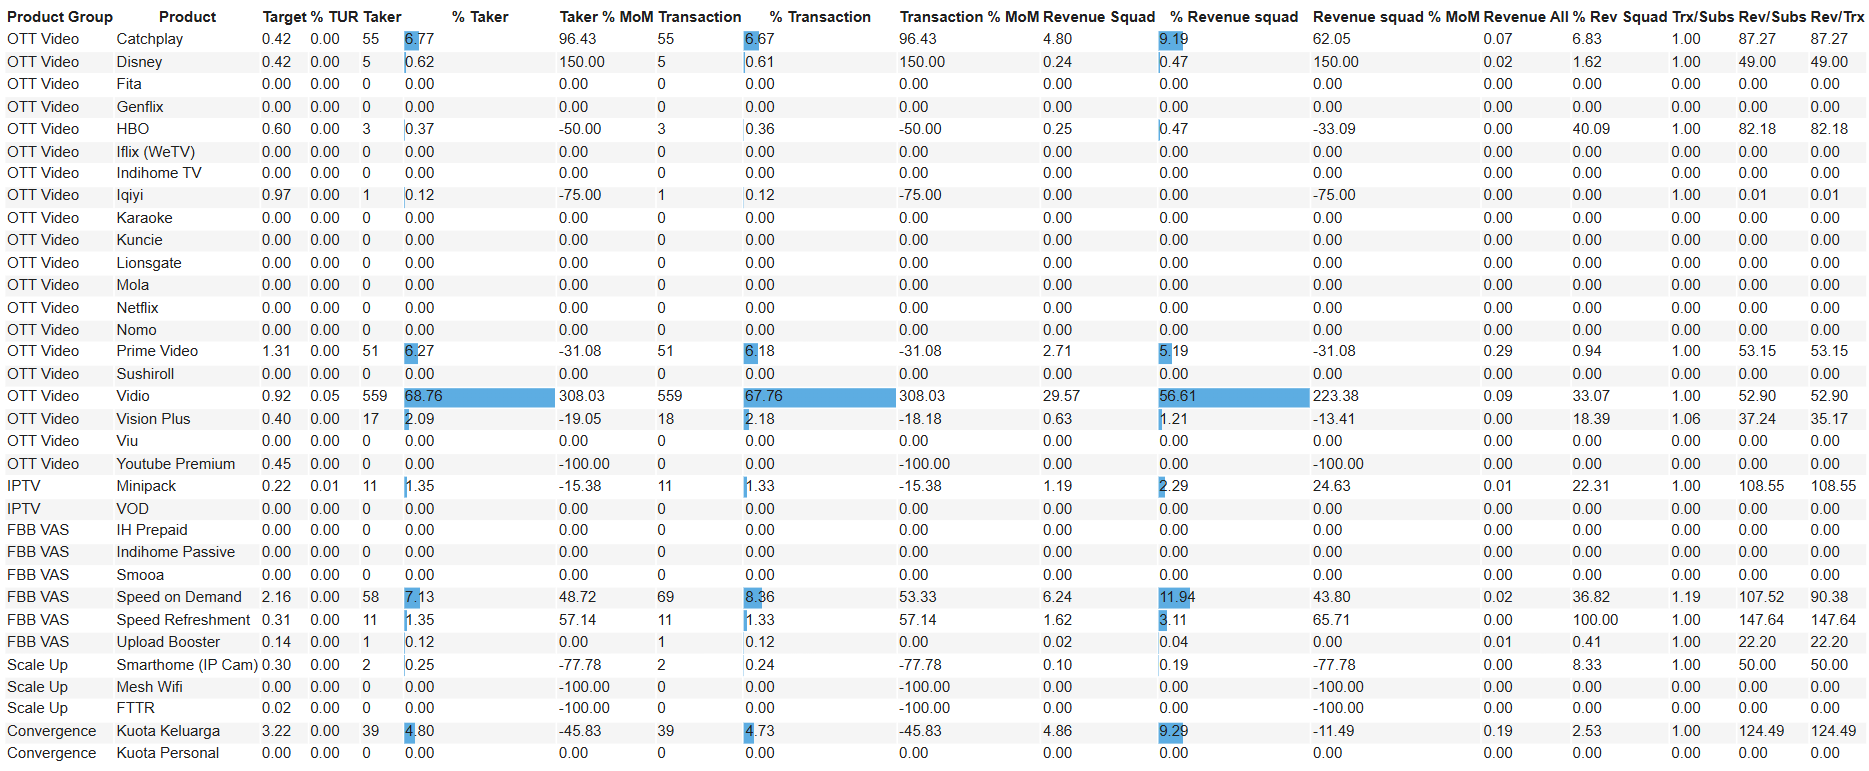
**Direct Answer**
In m0, total squad revenue was 52.24 mn IDR (+74.3% vs m1), with total revenue reaching 0.69 bn IDR. The OTT Video group dominated performance, driven primarily by the Vidio product, which accounted for over half of all squad revenue.

**Top 3 Quantified Drivers**
*   **Top Contributor:** Vidio was the clear leader, generating 29.57 mn IDR (56.6%) of all squad revenue from 559 takers.
*   **Highest Growth:** Vidio also led month-over-month growth, with takers increasing by +308% vs m1. Disney+ Hotstar followed with a significant +150% taker increase.
*   **Steepest Decline:** Smarthome (IP Cam) experienced the sharpest downturn, with revenue falling by -77.8% (-0.21 mn IDR) and takers declining by 7 vs m1.

**Bottom line**
The OTT Video group, led by Vidio's exceptional growth, drives the majority of product revenue. However, performance is highly concentrated, with smaller products like Smarthome declining sharply.

**Next Actions**
*   Investigate the drivers behind Vidio’s +308% MoM growth to apply learnings to other products.
*   Analyze the cause of Smarthome’s -77.8% revenue decline to inform a pivot or discontinuation strategy.
*   Explore scaling high-efficiency products like Speed Refreshment, which has a high revenue per subscriber.

**Caveats**
Analysis is based on a single month's performance (m0 vs m1) and may not represent long-term trends.
<br><br>

###Total response time
= 352.96 = 5m 52.96s<br>